In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
raw_df = pd.read_csv('./generalAccuracy_combined.csv.bz2', index_col=0)
raw_df = raw_df[raw_df['iteration'] <= 1000]

#basic_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_basicMethods_evaluated.csv')
#GNN_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_GNNRank_reTrained_syncRank_evaluated.csv')
#full_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_basicMethods_fullDataset_evaluated.csv')
#full_GNN_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_GNNRank_fullDataset_evaluated.csv')
#full_df['iteration'] = 500
#full_GNN_df['iteration'] = 500
#raw_df = pd.concat([basic_df, GNN_df]) #, full_df, full_GNN_df])

#raw_df = pd.read_csv('./data/imdb-wiki_results/IMDB-WIKI_basicMethods_stratified_evaluated.csv')

fairPR_df = raw_df[raw_df['Ranking Method'] == 'fairPageRank'].copy()
fairPR_df = fairPR_df.replace({'fairPageRank': 'Fairness-Aware PageRank\n(not post-processed)'})
#raw_df = pd.read_csv('./data/post_processing/EPIRA_10trials.csv')
#raw_df = pd.read_csv('./data/post_processing/EPIRA99_10trials.csv')
#raw_df = pd.read_csv('./data/post_processing/FAstarIR_10trials.csv')
raw_df = pd.read_csv('./data/post_processing/FAstarIRp60_10trials.csv')

#raw_df['bias_applied'] = True
raw_df = raw_df.rename(columns={'sampling strategy': 'sampling method', 'recovery method': 'Ranking Method'})
raw_df = pd.concat([raw_df, fairPR_df])

raw_df

,trial,iteration,value,bias_applied,sampling method,Ranking Method,metric,group
0,0,40,0.315214,False,RandomSampling,davidScore,tau,Overall
1,0,40,0.325972,False,RandomSampling,davidScore,tau,Privileged
2,0,40,0.305213,False,RandomSampling,davidScore,tau,Unprivileged
3,0,40,0.341602,False,RandomSampling,davidScore,tau,Privileged within-group
4,0,40,0.317428,False,RandomSampling,davidScore,tau,Between groups
...,...,...,...,...,...,...,...,...
212027,9,1000,0.189363,False,RankSampling,Fairness-Aware PageRank\n(not post-processed),tau,Privileged within-group
212028,9,1000,0.201053,False,RankSampling,Fairness-Aware PageRank\n(not post-processed),tau,Between groups
212029,9,1000,0.204627,False,RankSampling,Fairness-Aware PageRank\n(not post-processed),tau,Unprivileged within-group
212030,9,1000,0.150945,False,RankSampling,Fairness-Aware PageRank\n(not post-processed),exposure,Privileged


In [57]:
sel_df2 = raw_df[raw_df.bias_applied == True].drop(columns=['bias_applied'])
sel_df2 = sel_df2.pivot(index=['trial', 'sampling method', 'Ranking Method', 'iteration'], columns=['metric', 'group'], values='value').reset_index()
sel_df2

metric trial     sampling method  \
group                              
0          0  OversampleMinority   
1          0  OversampleMinority   
2          0  OversampleMinority   
3          0  OversampleMinority   
4          0  OversampleMinority   
...      ...                 ...   
14524      9        RankSampling   
14525      9        RankSampling   
14526      9        RankSampling   
14527      9        RankSampling   
14528      9        RankSampling   

metric                                 Ranking Method iteration       tau  \
group                                                             Overall   
0       Fairness-Aware PageRank\n(not post-processed)        50  0.472480   
1       Fairness-Aware PageRank\n(not post-processed)        60  0.473700   
2       Fairness-Aware PageRank\n(not post-processed)        70  0.438746   
3       Fairness-Aware PageRank\n(not post-processed)        80  0.424782   
4       Fairness-Aware PageRank\n(not post-processed)        90  0.409848   
...                                               ...       ...       ...   
14524                                  rankCentrality       960  0.242722   
14525                                  rankCentrality       970  0.257110   
14526                                  rankCentrality       980  0.251984   
14527                                  rankCentrality       990  0.256221   
14528                                  rankCentrality      1000  0.260579   

metric                                                                 \
group  Privileged Unprivileged Privileged within-group Between groups   
0        0.501820     0.439152                0.555582       0.471169   
1        0.501881     0.441544                0.554211       0.472113   
2        0.464209     0.409118                0.512967       0.436457   
3        0.452312     0.391856                0.506016       0.421409   
4        0.434392     0.377951                0.488506       0.403108   
...           ...          ...                     ...            ...   
14524    0.187646     0.276450                0.081225       0.222587   
14525    0.197016     0.293400                0.080097       0.234619   
14526    0.192748     0.287762                0.076157       0.229907   
14527    0.197798     0.291558                0.088407       0.234111   
14528    0.200506     0.296381                0.091242       0.237005   

metric                             exposure               
group  Unprivileged within-group Privileged Unprivileged  
0                       0.362663   0.150047     0.146013  
1                       0.369040   0.147101     0.148959  
2                       0.344580   0.147167     0.148893  
3                       0.320899   0.146817     0.149243  
4                       0.318590   0.145719     0.150342  
...                          ...        ...          ...  
14524                   0.361305   0.152708     0.143353  
14525                   0.385449   0.152708     0.143353  
14526                   0.378292   0.152708     0.143353  
14527                   0.381843   0.152708     0.143353  
14528                   0.389362   0.152708     0.143353  

[14529 rows x 12 columns]

In [58]:
sel_df3 = sel_df2.copy()
sel_df3['exposure ratio'] = sel_df3['exposure']['Unprivileged'] / sel_df3['exposure']['Privileged']
sel_df3['error ratio'] = sel_df3['tau']['Unprivileged'] / sel_df3['tau']['Privileged']
sel_df3['exposure difference'] = sel_df3['exposure']['Unprivileged'] - sel_df3['exposure']['Privileged']
sel_df3['error difference'] = sel_df3['tau']['Unprivileged'] - sel_df3['tau']['Privileged']
sel_df3['error'] = sel_df3['tau']['Overall']
sel_df3 = sel_df3[['trial', 'iteration', 'sampling method', 'Ranking Method', 'exposure ratio', 'error ratio', 'error',
                   'error difference', 'exposure difference']].droplevel('group', axis=1)
sel_df3 = sel_df3.replace({'OversampleMinority': 'Oversampling',
                            'oversampling': 'Oversampling',
                            'RankSampling': 'Rank-Based Sampling',
                            'rankSampling': 'Rank-Based Sampling',
                            'RandomSampling': 'Random Sampling',
                            'randomSampling': 'Random Sampling',
                            'fairPageRank': 'Fairness-Aware PageRank',
                            'davidScore': "David's Score",
                            'randomRankRecovery': 'Random Rank Recovery',
                            'rankCentrality': 'Rank Centrality',
                            'full dataset': 'Full Dataset'})

sel_df3 = sel_df3.rename(columns={'sampling method': 'Sampling Method'})
sel_df3

metric,trial,iteration,Sampling Method,Ranking Method,exposure ratio,error ratio,error,error difference,exposure difference
0,0,50,Oversampling,Fairness-Aware PageRank\n(not post-processed),0.973117,0.875118,0.472480,-0.062668,-0.004034
1,0,60,Oversampling,Fairness-Aware PageRank\n(not post-processed),1.012632,0.879779,0.473700,-0.060337,0.001858
2,0,70,Oversampling,Fairness-Aware PageRank\n(not post-processed),1.011725,0.881324,0.438746,-0.055090,0.001726
3,0,80,Oversampling,Fairness-Aware PageRank\n(not post-processed),1.016520,0.866340,0.424782,-0.060456,0.002425
4,0,90,Oversampling,Fairness-Aware PageRank\n(not post-processed),1.031726,0.870068,0.409848,-0.056442,0.004623
...,...,...,...,...,...,...,...,...,...
14524,9,960,Rank-Based Sampling,Rank Centrality,0.938740,1.473255,0.242722,0.088804,-0.009355
14525,9,970,Rank-Based Sampling,Rank Centrality,0.938740,1.489217,0.257110,0.096384,-0.009355
14526,9,980,Rank-Based Sampling,Rank Centrality,0.938740,1.492948,0.251984,0.095015,-0.009355
14527,9,990,Rank-Based Sampling,Rank Centrality,0.938740,1.474021,0.256221,0.093760,-0.009355


In [59]:
# Okabe-Ito color palette
lightblue = "#56B4E9"
yellow = "#F0E442"
orange = "#E69F00"
green = "#009E73"
purple = "#CC79A7"
red = "#D55E00"
blue = "#0072B2"
black = "#000000"
#palette = [black, orange, lightblue, green, yellow, blue, red, purple] # original order
palette = [black, orange, lightblue, green, red, purple] # custom order

#palette = sns.color_palette('tab10')
#palette[0] = palette[7]

sns.set_context("talk") # larger font size
sns.set_style('ticks')

df = sel_df3
ranking_methods = ['Random Rank Recovery', "David's Score", 'Rank Centrality', 'GNNRank', 'Fairness-Aware PageRank\n(not post-processed)']
sampling_methods = ['Full Dataset', 'Random Sampling', 'Oversampling', 'Rank-Based Sampling']
metrics = ['exposure difference', 'error difference', 'error']

df = df[df['Ranking Method'].isin(ranking_methods)]
df = df.melt(id_vars=['Sampling Method', 'Ranking Method', 'iteration'], value_vars=['error', 'exposure difference', 'error difference'])

df['metric_order'] = df.metric.map(metrics.index)
df['sampling_order'] = df['Sampling Method'].map(sampling_methods.index)
df['ranking_order'] = df['Ranking Method'].map(ranking_methods.index) #.map(list(reversed(ranking_methods)).index)
df = df.sort_values(by=['ranking_order', 'sampling_order', 'metric_order']).drop(columns=['ranking_order', 'sampling_order', 'metric_order'])
df

,Sampling Method,Ranking Method,iteration,metric,value
15297,Random Sampling,Random Rank Recovery,30,exposure difference,-0.001080
15298,Random Sampling,Random Rank Recovery,40,exposure difference,-0.007822
15299,Random Sampling,Random Rank Recovery,50,exposure difference,-0.009079
15300,Random Sampling,Random Rank Recovery,60,exposure difference,-0.005708
15301,Random Sampling,Random Rank Recovery,70,exposure difference,0.005731
...,...,...,...,...,...
14134,Rank-Based Sampling,Fairness-Aware PageRank\n(not post-processed),960,error,0.277103
14135,Rank-Based Sampling,Fairness-Aware PageRank\n(not post-processed),970,error,0.275803
14136,Rank-Based Sampling,Fairness-Aware PageRank\n(not post-processed),980,error,0.274790
14137,Rank-Based Sampling,Fairness-Aware PageRank\n(not post-processed),990,error,0.274815


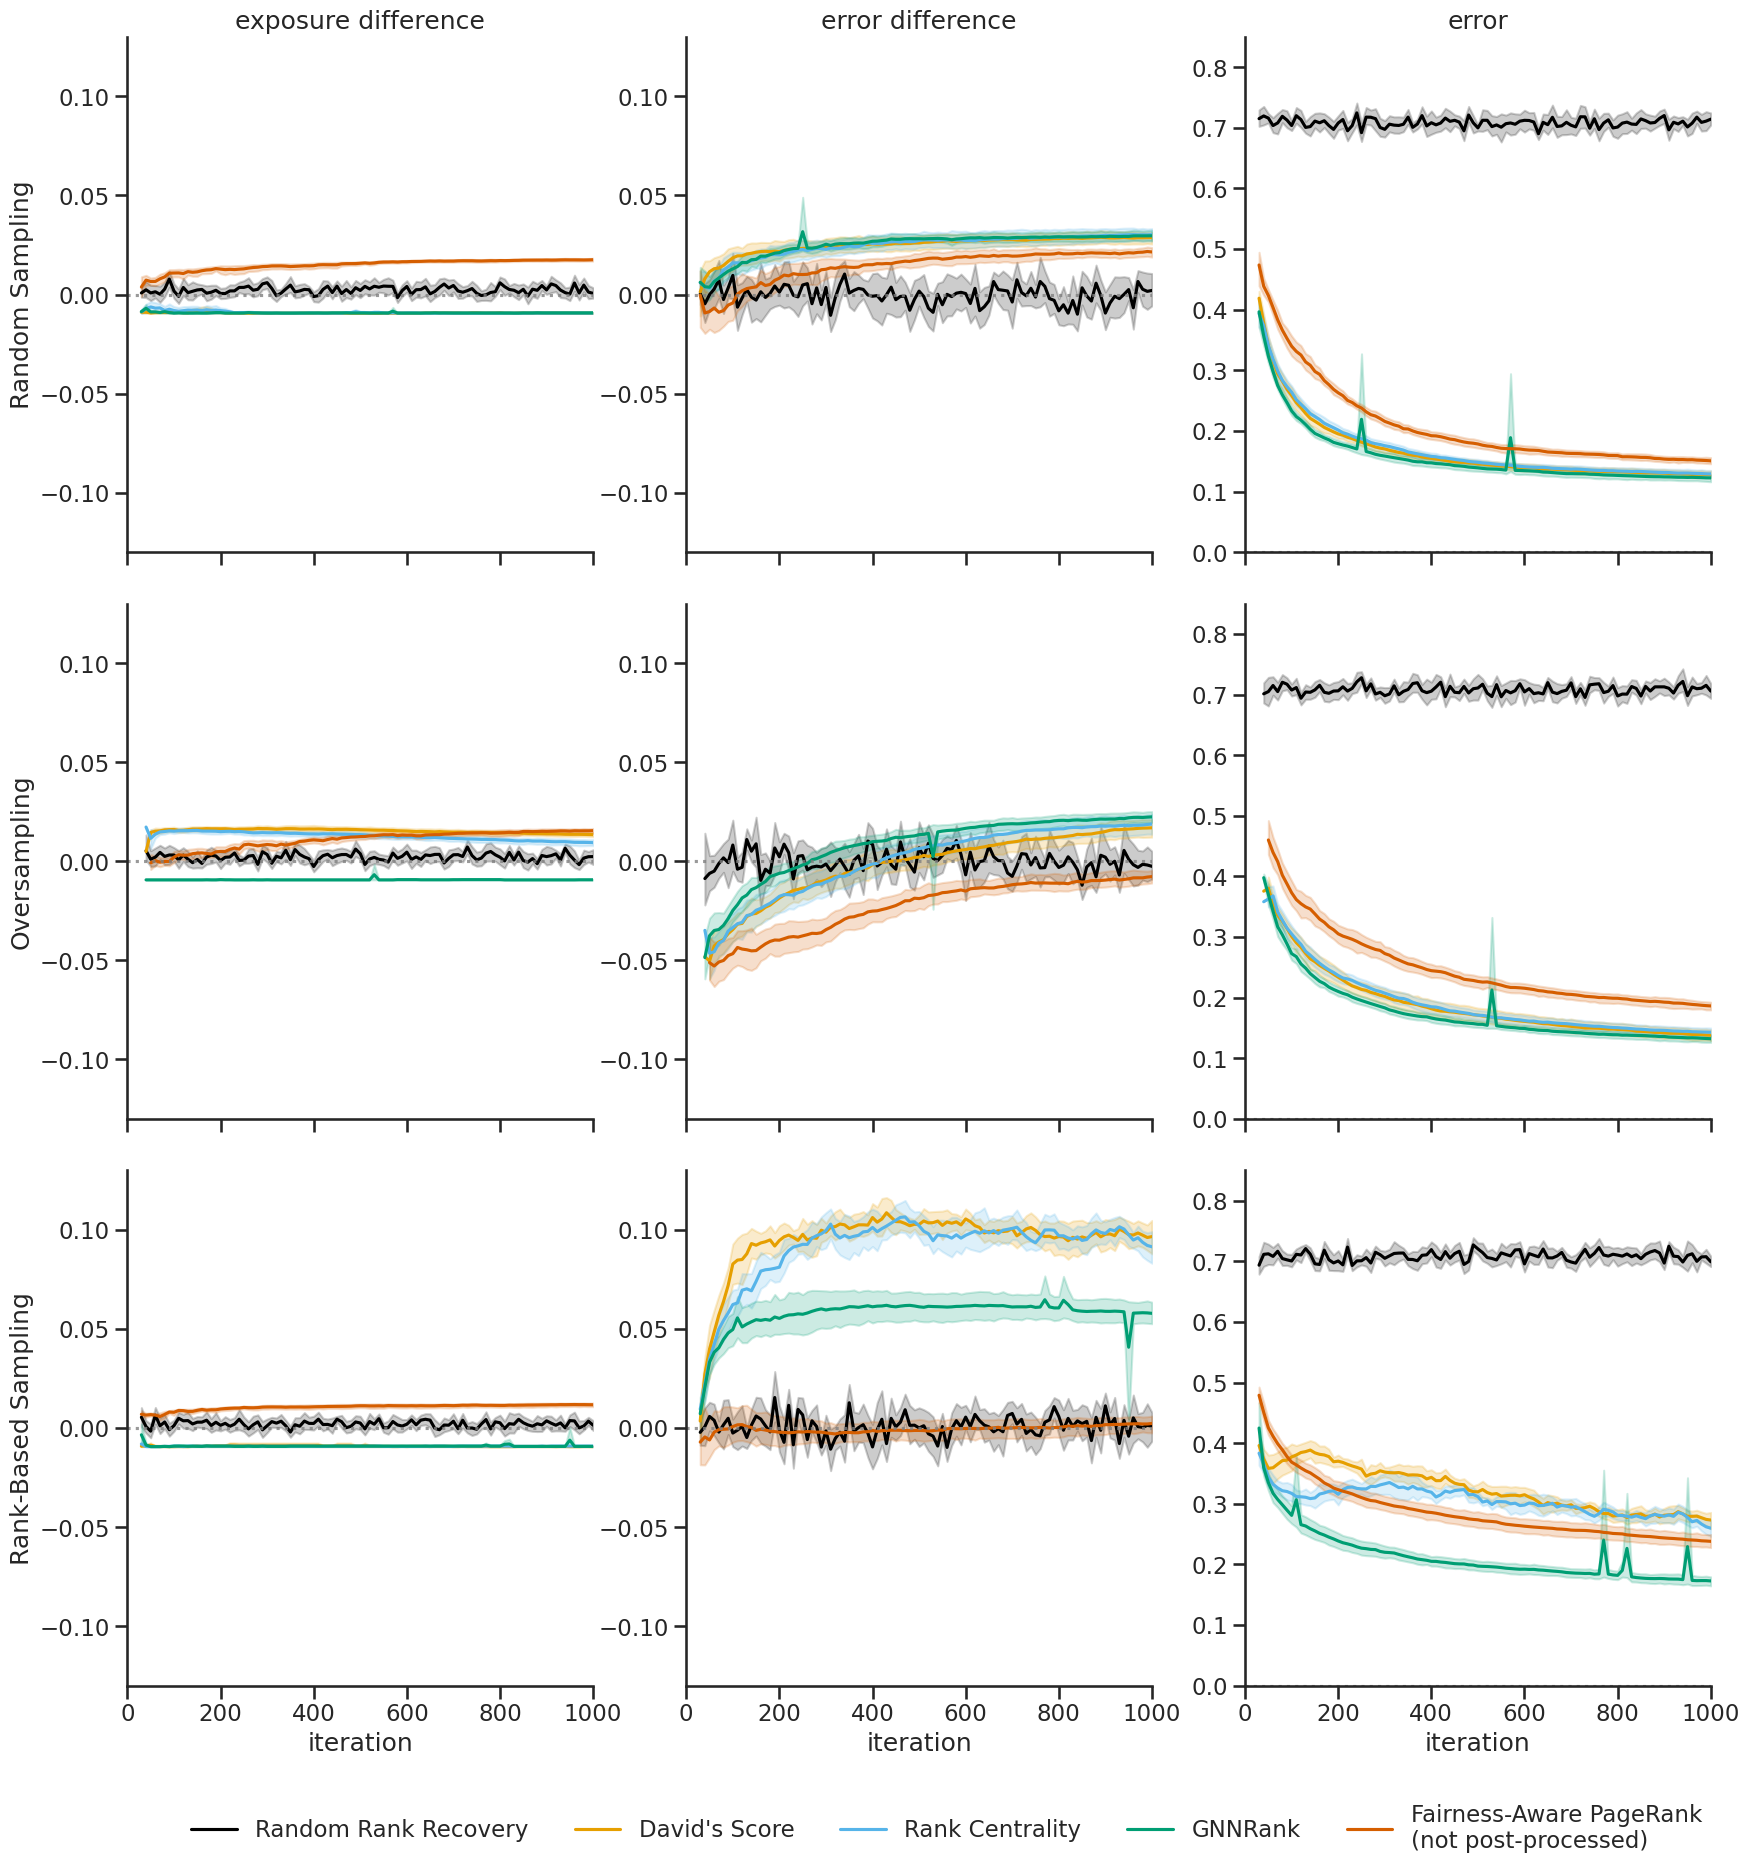

In [60]:
with sns.color_palette(palette):
    g = sns.relplot(df, x='iteration', y='value', col='metric', row='Sampling Method', hue='Ranking Method', kind='line',
                    facet_kws={'sharey': False}, aspect=1/1, height=6)

sns.move_legend(g, 'upper center', ncol=5, title=None, bbox_to_anchor=(0.45, 0))

g.refline(y=0, linestyle='dotted', alpha=0.8)
g.figure.subplots_adjust(wspace=0.2, hspace=0.1)

for (row_val, col_val), ax in g.axes_dict.items():
    ax.set_xticks([0,200,400,600,800,1000])
    ax.set_xlim((0,1000))

    if col_val == 'error':
        ax.set(ylim=(0,0.85), yticks=[0,.1,.2,.3,.4,.5,.6,.7,.8])
    else:
        ax.set(ylim=(-0.13,0.13), yticks=[-0.1,-0.05,0,0.05,0.1])  # for simulated data
        #ax.set(ylim=(-0.025,0.025), yticks=[-0.02,-0.01,0,0.01,0.02])  # for IMDB-WIKI
    
    if row_val == 'Random Sampling': ax.set_title(col_val)
    else: ax.set_title(None)

    if row_val == 'Rank-Based Sampling': ax.set_xlabel('iteration')

    if col_val == 'exposure difference':
        ax.set_ylabel(row_val, rotation=90)

plt.savefig('./data/combined_plots/FAstarIRp60_results_lineplots.png', dpi=300, bbox_inches="tight")